# 6/12/2022

# Computer vision
# Corner detection

# Muallif: Farrux Sotivoldiyev

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

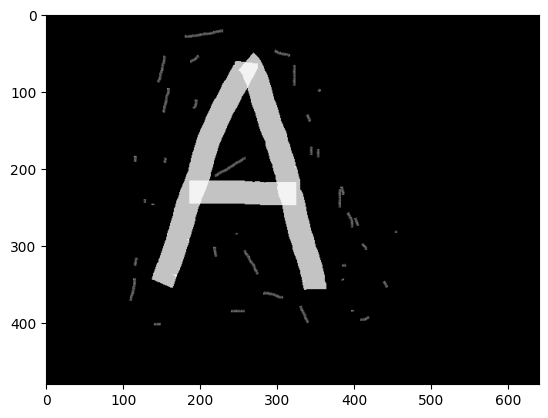

In [184]:
rasm_a = cv2.imread("RASMLAR/A.png",0)
plt.imshow(rasm_a,cmap='gray')

**`dilate` - funksiyasi** - kichik nuqta,chiziqlarni kattartirib beradi

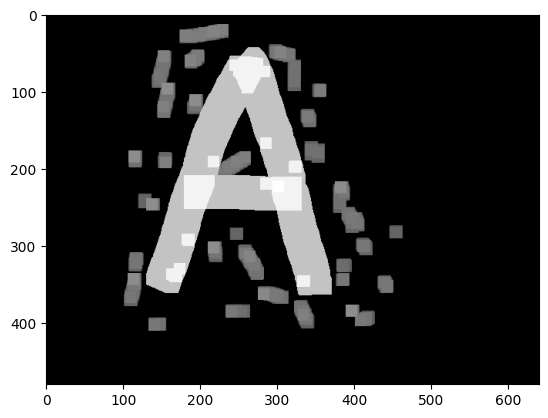

In [185]:
kernel = np.ones((15,15),np.uint8)
rasm_dilate = cv2.dilate(rasm_a,kernel,iterations=1)
plt.imshow(rasm_dilate,cmap='gray')

**`erode` - funksiyasi** - kichik nuqta,chiziqlarni yanada kichraytirib yuboradi

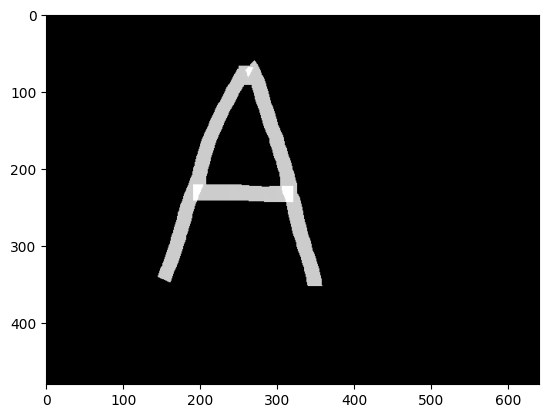

In [186]:
kernel = np.ones((10,10),np.uint8)
rasm_erosion = cv2.erode(rasm_a,kernel,iterations=1)
plt.imshow(rasm_erosion,cmap='gray')

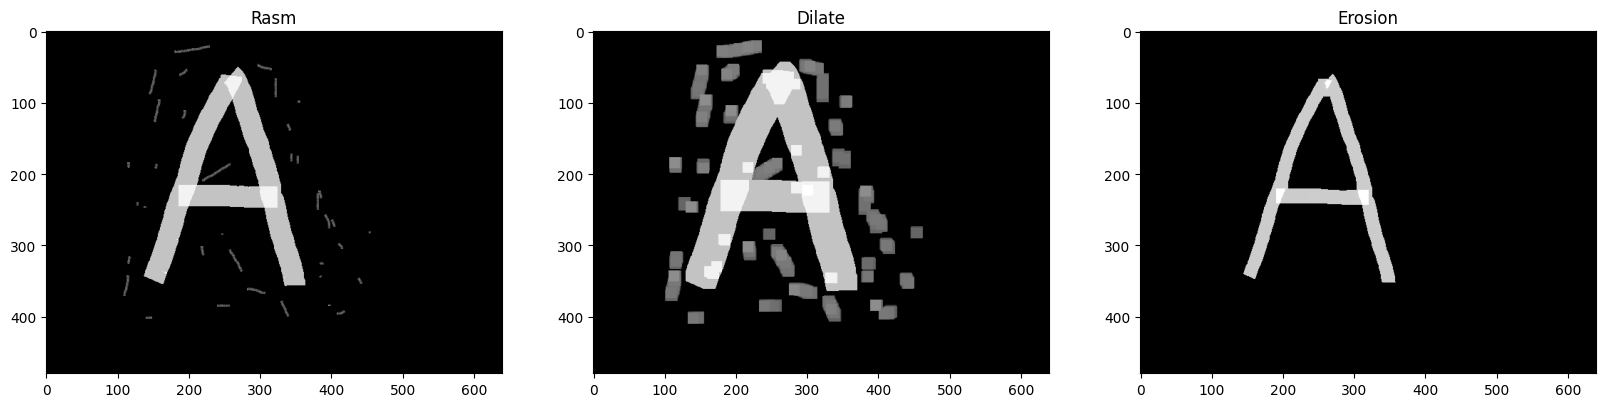

In [187]:
plt.figure(figsize=(20,15))
plt.subplot(131);plt.title("Rasm");plt.imshow(rasm_a,cmap='gray')
plt.subplot(132);plt.title("Dilate");plt.imshow(rasm_dilate,cmap='gray')
plt.subplot(133);plt.title("Erosion");plt.imshow(rasm_erosion,cmap='gray')

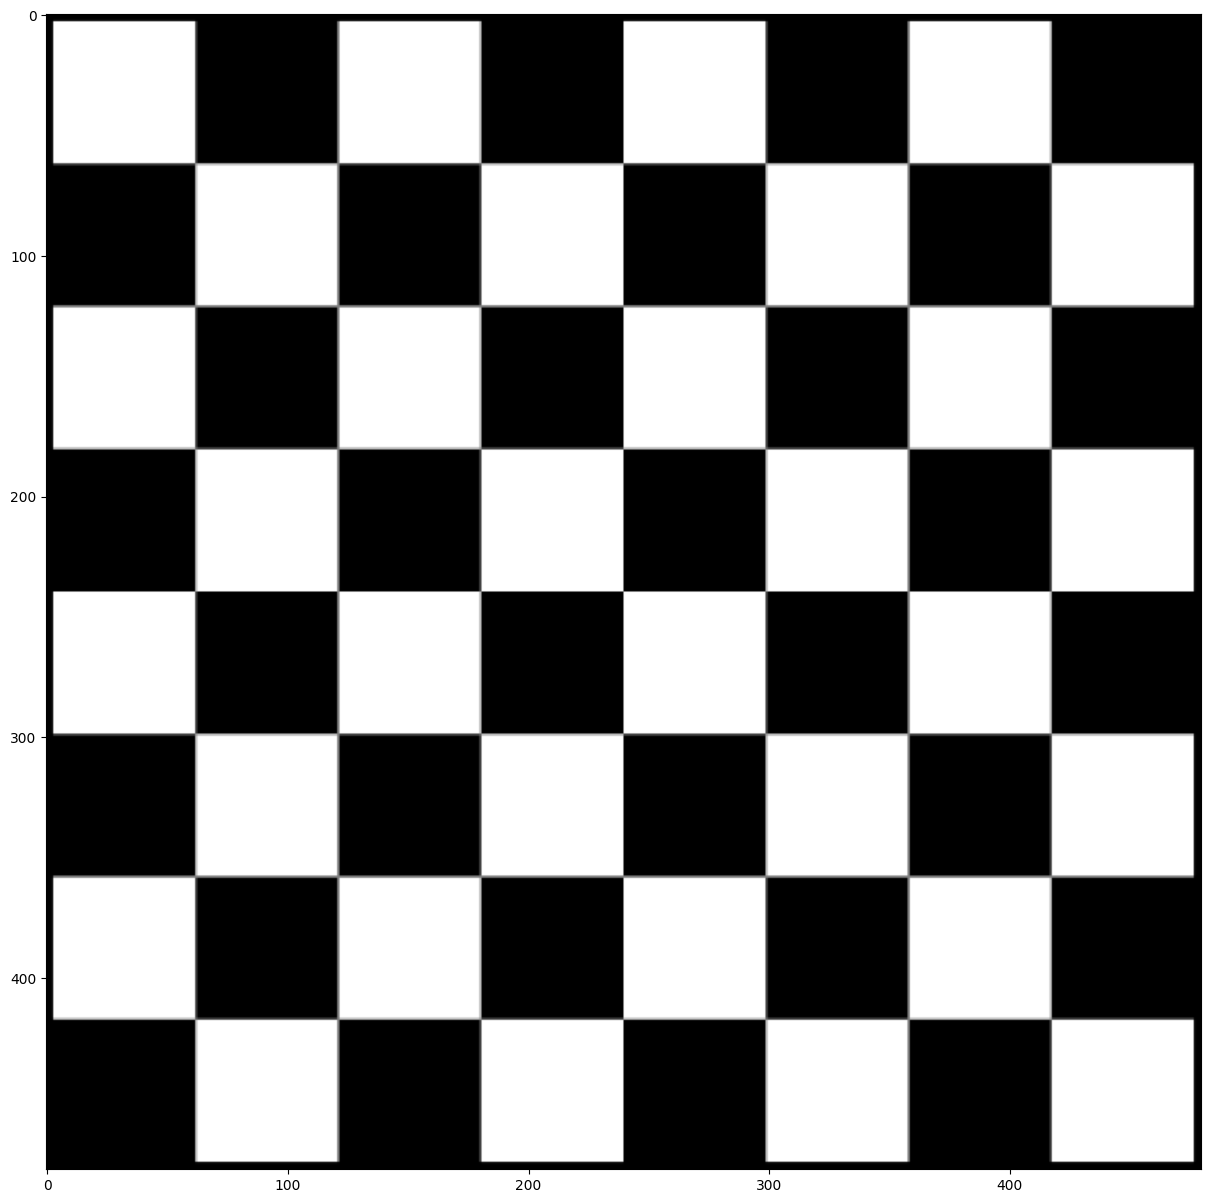

In [188]:
rasm = cv2.imread("RASMLAR/chessboard.png")
rasm = cv2.cvtColor(rasm,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,15))
plt.imshow(rasm)

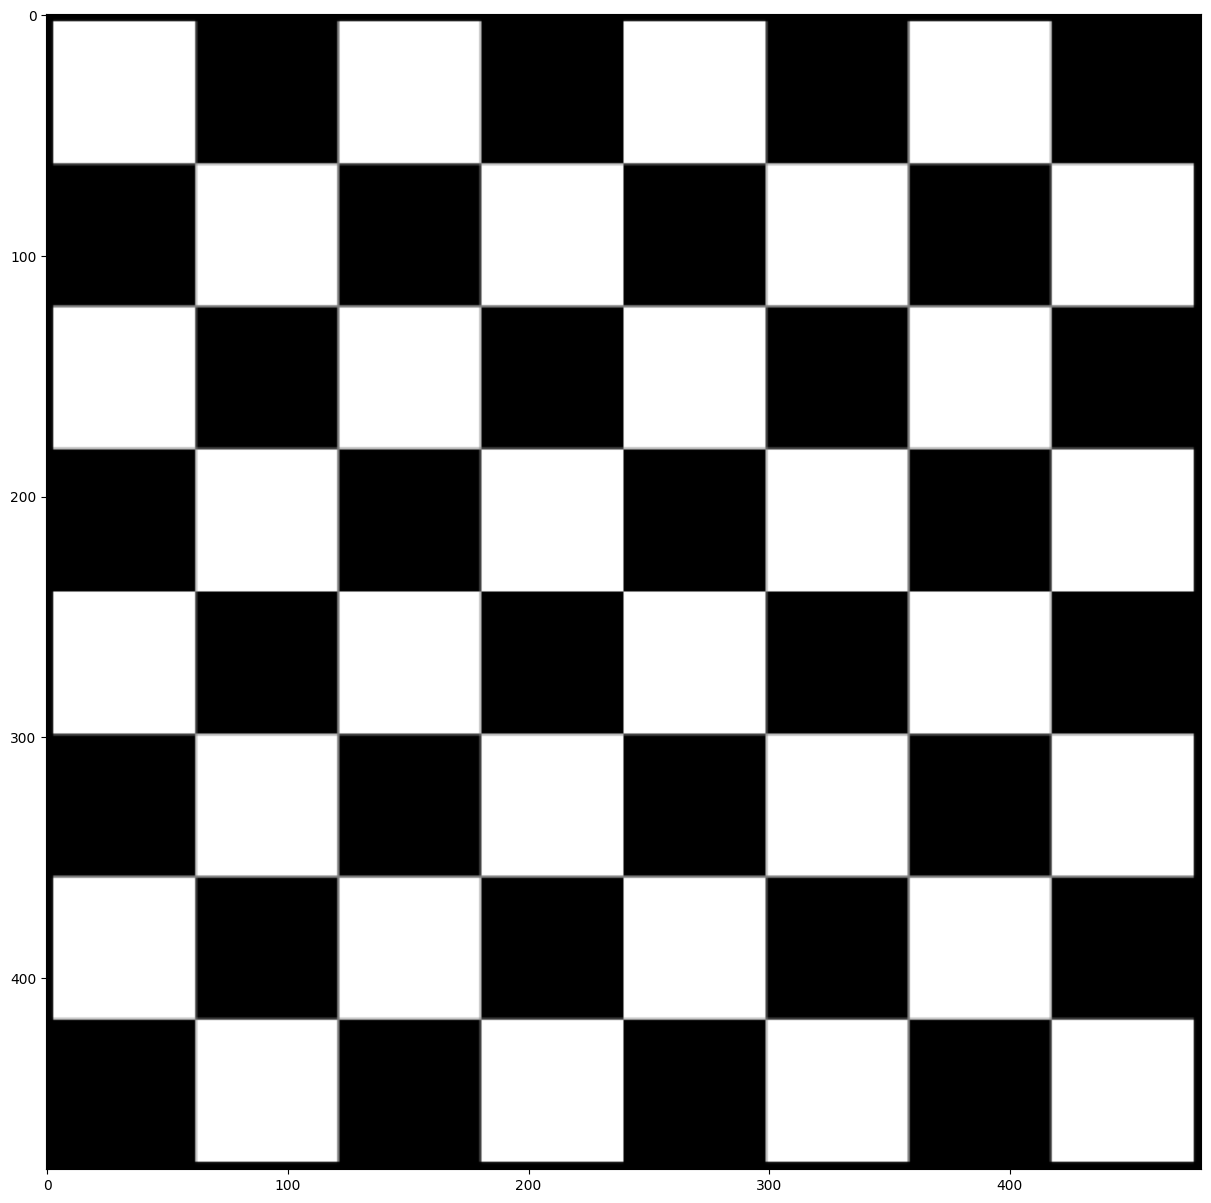

In [189]:
gray_rasm = cv2.cvtColor(rasm,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,15))
plt.imshow(gray_rasm,cmap='gray')

**`cornerHarris`** - cv2.cornerHarris(rasm(gray_rasm),blocksize(5),filterlash7x7(7),(0.04-0.07))

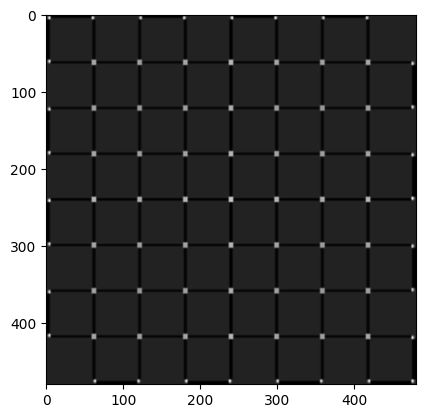

In [190]:
gray_rasm = np.float32(gray_rasm)
corner = cv2.cornerHarris(gray_rasm,5,7,0.04)
corner = cv2.dilate(corner,(7,7),iterations=1)
plt.imshow(corner,cmap='gray')
plt.show()

In [191]:
corner

array([[-3.5667159e+09, -1.2497930e+09,  1.0836365e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.2497930e+09,  1.5846232e+10,  8.2748031e+10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.0836349e+10,  8.2748031e+10,  3.1457427e+11, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.2094633e+11,  2.1972173e+11,  4.1158795e+10],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.1457427e+11,  8.2748031e+10,  1.0836365e+10],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         8.2748031e+10,  1.5846232e+10, -1.2497930e+09]], dtype=float32)

In [192]:
maxi = corner.max()
maxi

2755307800000.0

In [193]:
mini = corner.min()
mini

-432566240000.0

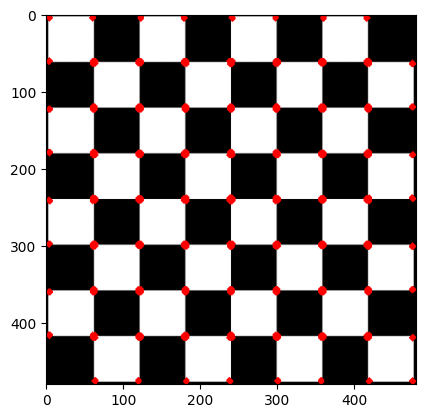

In [194]:
thresh = maxi / 2
for i in range(0,corner.shape[0]):
    for j in range(0,corner.shape[1]):
        if corner[i,j]>thresh:
            cv2.circle(rasm,(j,i),1,(255,0,0),3)
plt.imshow(rasm)

# Contur topish

**`2 talik rangda`**

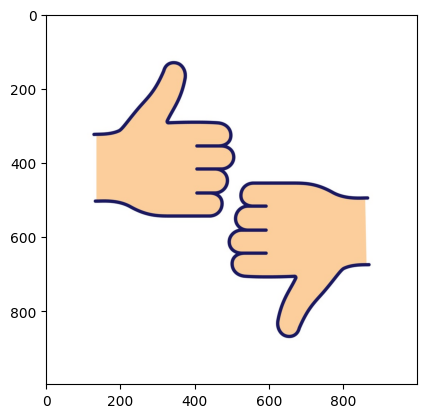

In [195]:
img = cv2.imread("RASMLAR/like_and_dislike_2xil.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

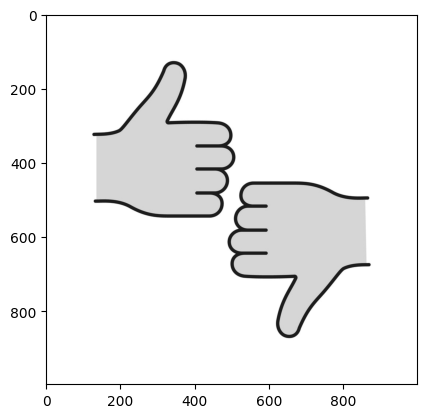

In [196]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')

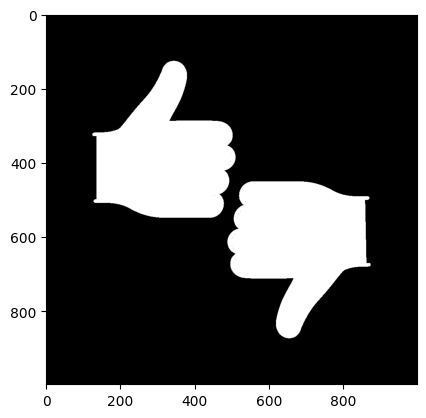

In [197]:
ret,binary_img = cv2.threshold(img_gray,230,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary_img,cmap='gray')

In [198]:
contour,soni = cv2.findContours(binary_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
soni

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [15, 13, -1, -1],
        [16, 14, -1, -1],
        [17, 15, -1, -1],
        [-1, 16, -1, -1]]], dtype=int32)

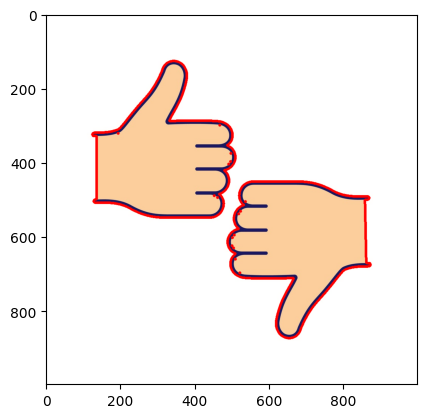

In [199]:
rasm_contours = cv2.drawContours(img,contour,-1,(255,0,0),5)
plt.imshow(rasm_contours)

**`3 talik rangda`**

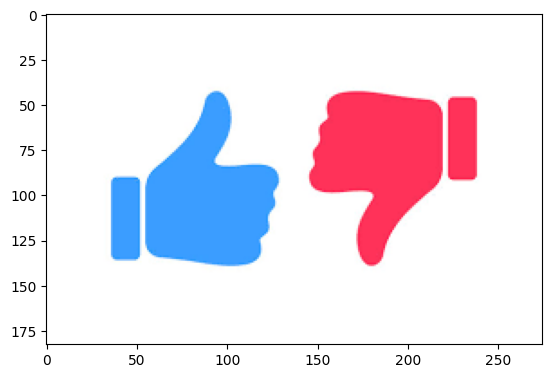

In [200]:
img = cv2.imread("RASMLAR/like_and_dislike_3xil.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

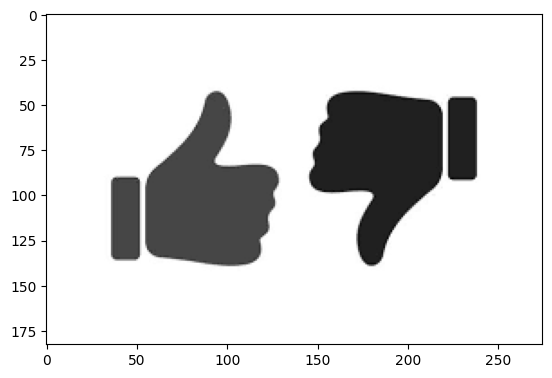

In [201]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')

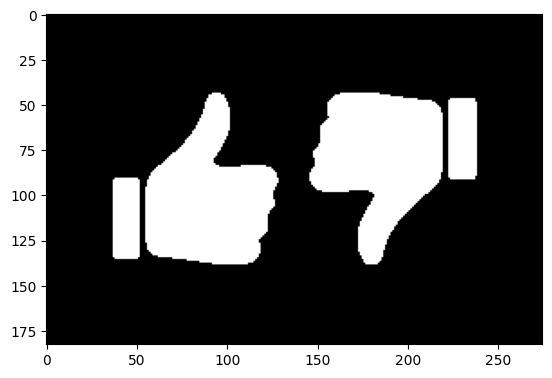

In [202]:
ret,binary_img = cv2.threshold(img_gray,150,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary_img,cmap='gray')

In [203]:
contour,soni = cv2.findContours(binary_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
soni

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [-1,  2, -1, -1]]], dtype=int32)

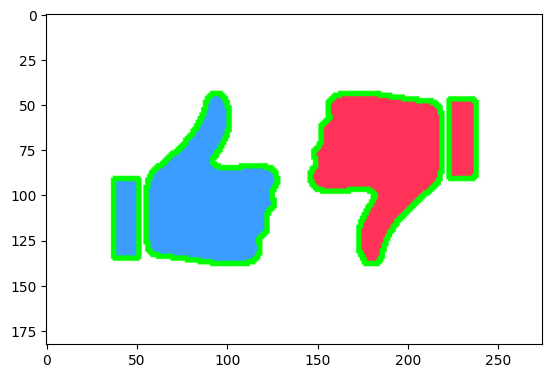

In [204]:
rasm_contours = cv2.drawContours(img,contour,-1,(0,255,0),2)
plt.imshow(rasm_contours)